In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet   # linear regression model (class)
from sklearn.metrics import mean_squared_error, mean_absolute_error   # accuracy metrics

LONDON_DATA_FILE_GROUPED_TIMESERIES= 'house_prices_london_grouped_timeseries.csv'

In [2]:
df = pd.read_csv(LONDON_DATA_FILE_GROUPED_TIMESERIES, header=0)

In [3]:
df = df[df['Sold Price']<1000000]

In [4]:
df.dropna(subset=['Type'], inplace=True)
dummy_df = pd.get_dummies(df['Type'])
df = pd.concat([df, dummy_df], axis=1)
df.drop('Type', axis=1, inplace=True)

In [5]:
#df.head()

In [6]:
#df.dropna(subset=['Postcode_short'], inplace=True)
dummy_df = pd.get_dummies(df['Postcode_short'])
df = pd.concat([df, dummy_df], axis=1)
df.drop('Postcode_short', axis=1, inplace=True)

In [7]:
#df.head()

In [8]:
final_df=df[df['Sold Year']>=1998] #data prior to this has Nan

In [9]:
final_df.shape

(9576, 199)

In [10]:
final_df=final_df.dropna() #drop all rows with Nan

In [11]:
final_df.shape

(8663, 199)

In [12]:
final_df.head(5)

,Sold Price,Sold Year,Sold Price prev year,Sold Price prev year2,Sold Price prev year3,D,F,O,S,T,...,WC1N,WC1R,WC1V,WC1X,WC2A,WC2B,WC2E,WC2H,WC2N,WC2R
12,112995.0,1998,79997.5,63950.0,57995.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,130000.0,1998,149497.5,94000.0,77000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14,118000.0,1998,102000.0,80000.0,81000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,121075.0,1999,112995.0,79997.5,63950.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,140000.0,1999,130000.0,149497.5,94000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train_df=final_df[final_df['Sold Year']<=2010]
test_df=final_df[final_df['Sold Year']>2010]

In [14]:
train_df.shape

(5980, 199)

In [15]:
test_df.shape

(2683, 199)

In [16]:
X_train=train_df.drop(['Sold Price'],axis=1)
X_train = np.array(X_train)
y_train=train_df['Sold Price'] 
y_train = np.array(y_train)

In [17]:
X_test=test_df.drop(['Sold Price'],axis=1)
X_test = np.array(X_test)
y_test=test_df['Sold Price'] 
y_test = np.array(y_test)

In [18]:
print(X_train.shape)
print(y_train.shape)

(5980, 198)
(5980,)


In [19]:
print(X_test.shape)
print(y_test.shape)

(2683, 198)
(2683,)


In [20]:
model = ElasticNet() 
model.fit(X_train, y_train) 

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
y_pred = model.predict(X_test)

In [22]:
y_actual = y_test #rename to make it easier to understand
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.665720541099
-10.0038267678
565354147602.0
173242.832837


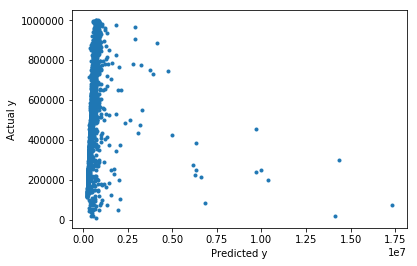

-10.0038267678


In [23]:
plt.scatter(y_pred, y_test, marker='.')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
plt.show()
print(model.score(X_test, y_test))


In [24]:
model.coef_ #overfitting as too many features with OLE

array([  3.27523169e+03,   2.09180117e-01,   2.09554686e-01,
         2.99800992e-01,   8.01747411e+03,  -1.23831638e+04,
         0.00000000e+00,   2.94063409e+03,   1.42305556e+03,
        -3.33878006e+02,  -7.99587205e+02,  -2.90757441e+02,
        -7.06761646e+02,  -8.87662918e+02,  -2.22719416e+02,
        -8.03219853e+02,  -9.02133435e+02,  -9.38469955e+02,
        -2.11992771e+02,   8.82037085e+01,  -2.24995351e+02,
         0.00000000e+00,  -2.08391088e+02,  -7.83644355e+02,
        -4.23071268e+02,  -1.04378873e+03,  -8.81414924e+02,
         2.34112744e+02,  -1.95583307e+02,  -6.59102834e+01,
         2.40845760e+01,  -1.88438531e+02,   4.31606221e+02,
         4.13443150e+01,   2.37517268e+01,   2.99125108e+02,
        -3.88811433e+02,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   8.71628030e+01,
         7.80316979e+00,   0.00000000e+00,   2.52527285e+01,
        -3.10648559e+01,   0.00000000e+00,  -7.31902476e+01,
         1.38598679e+02,

y_pred = model.predict(X_test)
y_pred = np.ceil(y_pred) #set ceiling value for y_pred
y_actual = y_test #rename to make it easier to understand
mean_squared_error(y_actual, y_pred) 

# Test R^2
print(model.score(X_test, y_actual))
plt.scatter(y_pred, y_actual, marker='.')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
plt.show()
#output not that useful here


In [25]:
for a, b in zip(y_pred, y_actual):
    print("Predicted = {0}, Actual = {1}".format(a, b))

Predicted = 337598.72521476354, Actual = 296687.5
Predicted = 446925.81291915197, Actual = 362000.0
Predicted = 426274.44252467435, Actual = 406500.0
Predicted = 346910.492078064, Actual = 295000.0
Predicted = 452749.4108623117, Actual = 480000.0
Predicted = 440647.56806818955, Actual = 465000.0
Predicted = 354603.0653436035, Actual = 335000.0
Predicted = 465581.00627843663, Actual = 570000.0
Predicted = 371644.3097176943, Actual = 397500.0
Predicted = 503154.0496747857, Actual = 731250.0
Predicted = 395869.572013543, Actual = 475000.0
Predicted = 579701.1753486544, Actual = 650000.0
Predicted = 440445.4703537533, Actual = 500000.0
Predicted = 1352698.418047282, Actual = 415000.0
Predicted = 631250.3198214807, Actual = 719000.0
Predicted = 483928.2551497314, Actual = 518000.0
Predicted = 744857.2394705294, Actual = 250000.0
Predicted = 680275.5712518804, Actual = 857500.0
Predicted = 340642.5192345977, Actual = 245000.0
Predicted = 267161.6998960292, Actual = 166100.0
Predicted = 36005

Predicted = 483429.71535102, Actual = 495000.0
Predicted = 495394.9181888411, Actual = 530000.0
Predicted = 512436.2235694537, Actual = 625000.0
Predicted = 541427.2199851125, Actual = 762260.0
Predicted = 603815.2444775682, Actual = 827025.0
Predicted = 677882.5969223594, Actual = 861500.0
Predicted = 743091.8065410936, Actual = 855000.0
Predicted = 467616.5527606914, Actual = 625000.0
Predicted = 425270.2524059741, Actual = 352500.0
Predicted = 449668.5424109744, Actual = 420000.0
Predicted = 432529.1130672274, Actual = 587475.0
Predicted = 467743.16919037234, Actual = 580000.0
Predicted = 524786.5175427115, Actual = 590000.0
Predicted = 578796.3002164438, Actual = 680000.0
Predicted = 600752.2769055031, Actual = 571000.0
Predicted = 401211.99675558135, Actual = 552500.0
Predicted = 456430.9383412106, Actual = 725000.0
Predicted = 534713.3778778445, Actual = 717750.0
Predicted = 622087.4007505188, Actual = 809100.0
Predicted = 694667.6357474895, Actual = 619375.0
Predicted = 6357374.

Predicted = 342244.6942186095, Actual = 326500.0
Predicted = 509332.18573648296, Actual = 610288.5
Predicted = 593636.946325345, Actual = 715000.0
Predicted = 363345.8594397586, Actual = 399950.0
Predicted = 568078.8776681656, Actual = 672500.0
Predicted = 625627.9226314723, Actual = 880000.0
Predicted = 396532.59967929404, Actual = 447500.0
Predicted = 594293.866765839, Actual = 800000.0
Predicted = 696279.6203235853, Actual = 980000.0
Predicted = 433090.86393592786, Actual = 460000.0
Predicted = 400171.9744797144, Actual = 280000.0
Predicted = 664344.8566130288, Actual = 845000.0
Predicted = 470965.55527022574, Actual = 465000.0
Predicted = 400282.2574988669, Actual = 50000.0
Predicted = 250678.91516205855, Actual = 150000.0
Predicted = 326688.3513731733, Actual = 236000.0
Predicted = 322222.33314616606, Actual = 230250.0
Predicted = 249905.30342382472, Actual = 175000.0
Predicted = 328615.79528606124, Actual = 236250.0
Predicted = 319446.3454146655, Actual = 238000.0
Predicted = 259

Predicted = 524809.1346764462, Actual = 699995.0
Predicted = 589561.3099559043, Actual = 895000.0
Predicted = 706940.2454257198, Actual = 586000.0
Predicted = 674449.4938330268, Actual = 950000.0
Predicted = 747576.5825019544, Actual = 727500.0
Predicted = 643301.0631760331, Actual = 775000.0
Predicted = 662579.1233288199, Actual = 635000.0
Predicted = 668265.4432887705, Actual = 842500.0
Predicted = 693102.9180051181, Actual = 845000.0
Predicted = 864302.8887225939, Actual = 917475.0
Predicted = 532992.1199263195, Actual = 585000.0
Predicted = 523622.4178134361, Actual = 826000.0
Predicted = 598087.7586356318, Actual = 720000.0
Predicted = 650303.7455924395, Actual = 797500.0
Predicted = 719829.6786236493, Actual = 562500.0
Predicted = 658409.1658352781, Actual = 971250.0
Predicted = 721175.9960043244, Actual = 670000.0
Predicted = 333152.1187378317, Actual = 248000.0
Predicted = 319365.4450331805, Actual = 262125.0
Predicted = 329673.25138196535, Actual = 285000.0
Predicted = 340093.